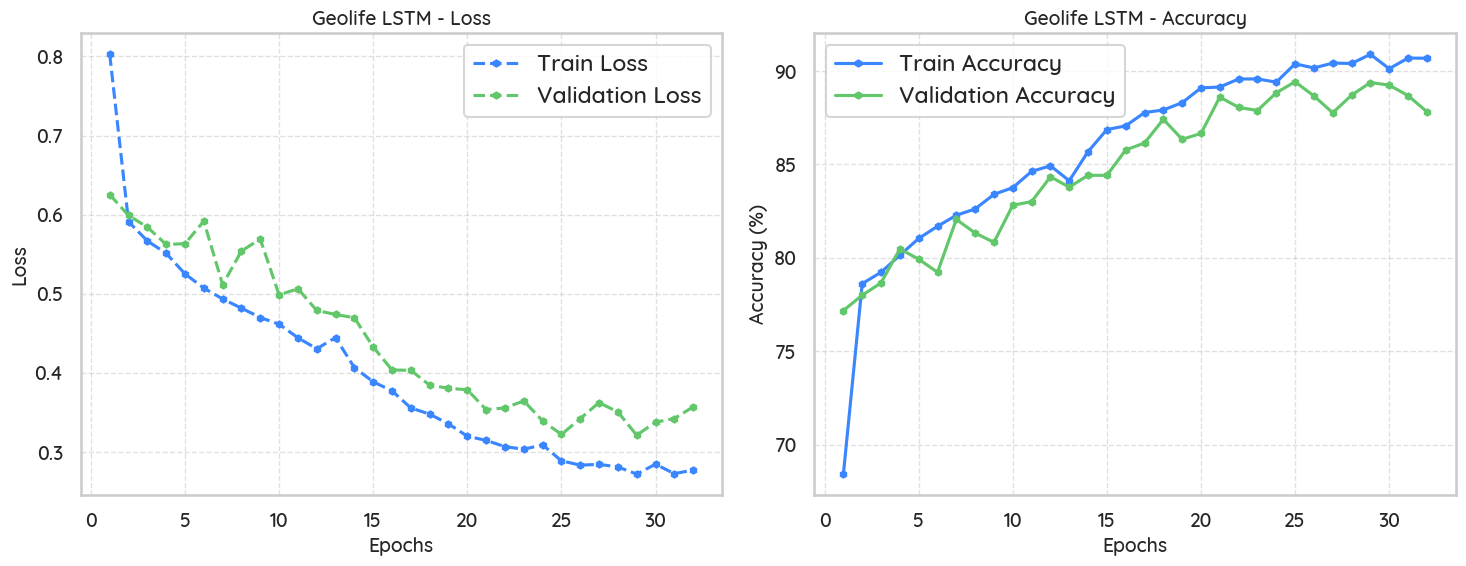

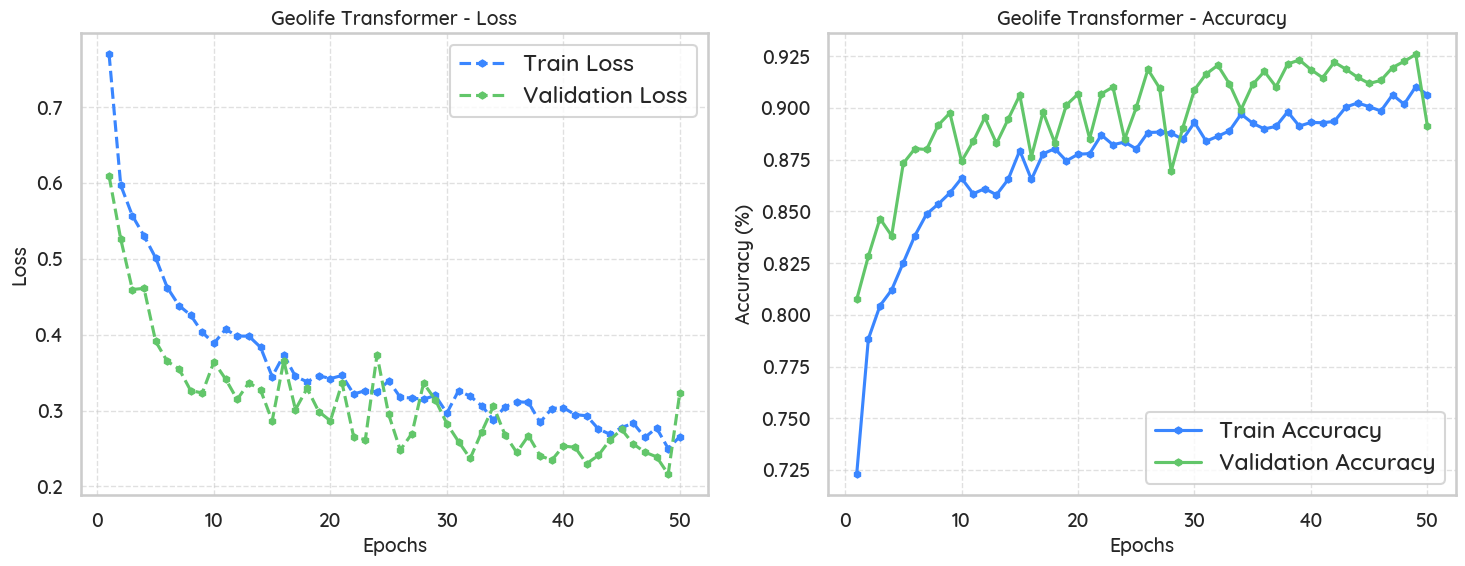

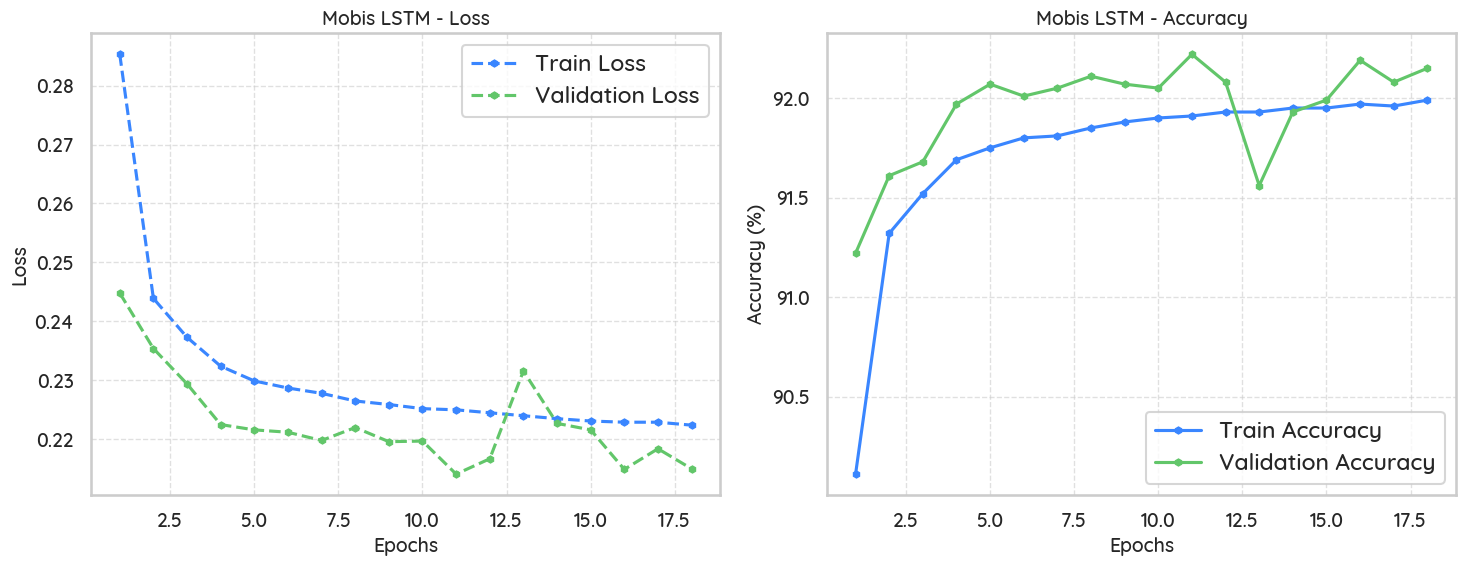

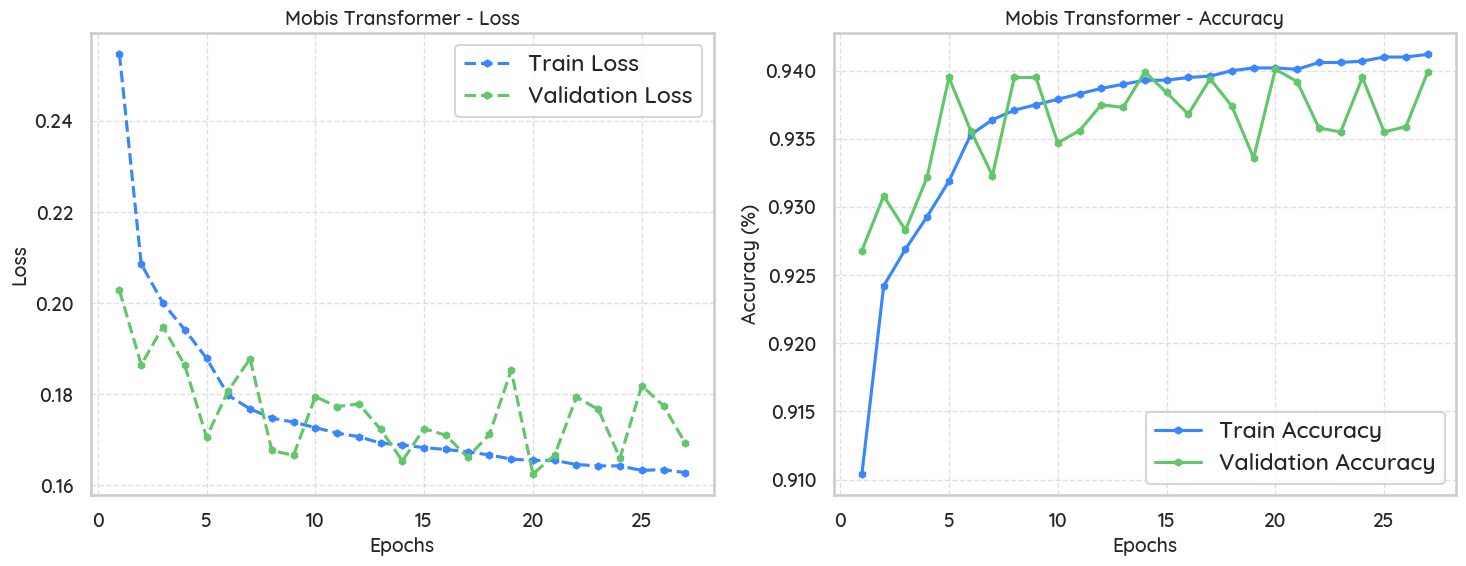

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style for aesthetic plots
# sns.set_theme(style="whitegrid", palette="pastel")
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,    # Thinner gridlines
                "xtick.labelsize": 14,       # X-axis tick labels
                "ytick.labelsize": 14,       # Y-axis tick labels
                "axes.titlesize": 14,     # Larger title font
                "axes.labelsize": 14,     # Adjust label font size
                "legend.frameon": True,   # Add a frame to the legend
                  }, 
              context="talk")

# File paths for different experiments
file_paths = {
    "Geolife LSTM": "/data/A-TrajectoryTransformer/models/lstm/geolife/lstm.log",
    "Geolife Transformer": "/data/A-TrajectoryTransformer/models/transformer/geolife/train.log",
    "Mobis LSTM": "/data/A-TrajectoryTransformer/models/lstm/mobis/lstm.log",
    "Mobis Transformer": "/data/A-TrajectoryTransformer/models/transformer/mobis/train.log",
}

# Patterns for LSTM
lstm_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r"Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

# Patterns for Transformer
transformer_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r", Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

def extract_metrics(file_path, patterns):
    with open(file_path, 'r') as file:
        log_content = file.read()

    train_losses = [float(tl) for tl in re.findall(patterns["train_loss"], log_content)]
    train_accuracies = [float(ta) for ta in re.findall(patterns["train_acc"], log_content)]
    val_losses = [float(vl) for vl in re.findall(patterns["val_loss"], log_content)]
    val_accuracies = [float(va) for va in re.findall(patterns["val_acc"], log_content)]

    return train_losses, train_accuracies, val_losses, val_accuracies

def plot_metrics(epochs, train_losses, val_losses, train_accuracies, val_accuracies, title):
    plt.figure(figsize=(15,6))

    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', marker='h', markersize=5, linestyle='--', color='#3A86FF')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='h', markersize=5, linestyle='--', color='#62C66A')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='h', markersize=5, linestyle='-', color='#3A86FF')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='h', markersize=5, linestyle='-', color='#62C66A')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    save_path = f"{title.replace(' ', '_').lower()}.png"  # Save file as title in lowercase, spaces replaced with underscores
    plt.savefig(save_path, dpi=300, bbox_inches='tight') 
    plt.show()

# Process each file and generate plots
for experiment_name, file_path in file_paths.items():
    # Determine patterns based on model type
    patterns = lstm_patterns if "LSTM" in experiment_name else transformer_patterns
    train_losses, train_accuracies, val_losses, val_accuracies = extract_metrics(file_path, patterns)

    epochs = list(range(1, len(train_accuracies) + 1))
    plot_metrics(epochs, train_losses, val_losses, train_accuracies, val_accuracies, experiment_name)

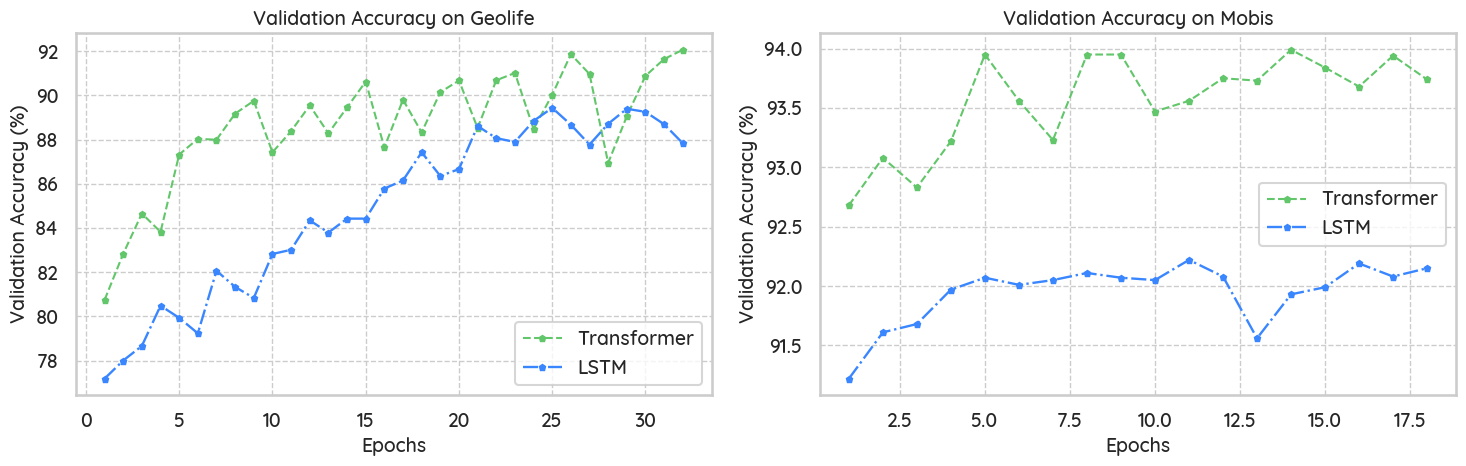

In [2]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for aesthetic plots
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,    # Thinner gridlines
                "xtick.labelsize": 14,       # X-axis tick labels
                "ytick.labelsize": 14,       # Y-axis tick labels
                "axes.titlesize": 14,     # Larger title font
                "axes.labelsize": 14,     # Adjust label font size
                "legend.frameon": True,   # Add a frame to the legend
                  }, 
              context="talk")

# File paths for different experiments
file_paths = {
    "Geolife LSTM": "/data/A-TrajectoryTransformer/models/lstm/geolife/lstm.log",
    "Geolife Transformer": "/data/A-TrajectoryTransformer/models/transformer/geolife/train.log",
    "Mobis LSTM": "/data/A-TrajectoryTransformer/models/lstm/mobis/lstm.log",
    "Mobis Transformer": "/data/A-TrajectoryTransformer/models/transformer/mobis/train.log",
}

# Patterns for LSTM
lstm_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r"Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

# Patterns for Transformer
transformer_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r", Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

def extract_metrics(file_path, patterns):
    with open(file_path, 'r') as file:
        log_content = file.read()

    train_losses = [float(tl) for tl in re.findall(patterns["train_loss"], log_content)]
    train_accuracies = [float(ta) for ta in re.findall(patterns["train_acc"], log_content)]
    val_losses = [float(vl) for vl in re.findall(patterns["val_loss"], log_content)]
    val_accuracies = [float(va) for va in re.findall(patterns["val_acc"], log_content)]

    return train_losses, train_accuracies, val_losses, val_accuracies

def plot_validation_comparison_side_by_side(geolife_data, mobis_data):
    plt.figure(figsize=(15, 5))

    # Determine the min length for both datasets
    min_length_geolife = min(len(geolife_data[1]), len(geolife_data[3]))
    min_length_mobis = min(len(mobis_data[1]), len(mobis_data[3]))

    # Limit data by min length
    geolife_data = (geolife_data[0][:min_length_geolife], 
                    geolife_data[1][:min_length_geolife],
                    geolife_data[2][:min_length_geolife],
                    geolife_data[3][:min_length_geolife])

    mobis_data = (mobis_data[0][:min_length_mobis], 
                  mobis_data[1][:min_length_mobis],
                  mobis_data[2][:min_length_mobis],
                  mobis_data[3][:min_length_mobis])

    # Geolife subplot
    plt.subplot(1, 2, 1)
    epochs_lstm, val_acc_lstm, epochs_transformer, val_acc_transformer = geolife_data
    plt.plot(epochs_transformer, [v * 100 for v in val_acc_transformer], label='Transformer', marker='p', linestyle='--', linewidth=1.5, markersize=5, color='#62C66A')
    plt.plot(epochs_lstm, val_acc_lstm, label='LSTM', marker='p', linestyle='-.', linewidth=1.7, markersize=5, color='#3A86FF')
    plt.title('Validation Accuracy on Geolife', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Validation Accuracy (%)', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=1)

    # Mobis subplot
    plt.subplot(1, 2, 2)
    epochs_lstm, val_acc_lstm, epochs_transformer, val_acc_transformer = mobis_data
    plt.plot(epochs_transformer, [v * 100 for v in val_acc_transformer], label='Transformer', marker='p', linestyle='--', linewidth=1.5, markersize=5, color='#62C66A')
    plt.plot(epochs_lstm, val_acc_lstm, label='LSTM', marker='p', linestyle='-.', linewidth=1.7, markersize=5, color='#3A86FF')
    plt.title('Validation Accuracy on Mobis', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Validation Accuracy (%)', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=1)

    plt.tight_layout()
    save_path = f"val.png"  # Save file as title in lowercase, spaces replaced with underscores
    plt.savefig(save_path, dpi=300, bbox_inches='tight') 
    plt.show()

# Extract metrics for Geolife and Mobis
geolife_lstm_key = "Geolife LSTM"
geolife_transformer_key = "Geolife Transformer"
mobis_lstm_key = "Mobis LSTM"
mobis_transformer_key = "Mobis Transformer"

# Geolife data
train_losses_lstm, train_accuracies_lstm, val_losses_lstm, val_acc_lstm = extract_metrics(file_paths[geolife_lstm_key], lstm_patterns)
epochs_lstm_geolife = list(range(1, len(val_acc_lstm) + 1))
train_losses_transformer, train_accuracies_transformer, val_losses_transformer, val_acc_transformer = extract_metrics(file_paths[geolife_transformer_key], transformer_patterns)
epochs_transformer_geolife = list(range(1, len(val_acc_transformer) + 1))

geolife_data = (epochs_lstm_geolife, val_acc_lstm, epochs_transformer_geolife, val_acc_transformer)

# Mobis data
train_losses_lstm, train_accuracies_lstm, val_losses_lstm, val_acc_lstm = extract_metrics(file_paths[mobis_lstm_key], lstm_patterns)
epochs_lstm_mobis = list(range(1, len(val_acc_lstm) + 1))
train_losses_transformer, train_accuracies_transformer, val_losses_transformer, val_acc_transformer = extract_metrics(file_paths[mobis_transformer_key], transformer_patterns)
epochs_transformer_mobis = list(range(1, len(val_acc_transformer) + 1))

mobis_data = (epochs_lstm_mobis, val_acc_lstm, epochs_transformer_mobis, val_acc_transformer)

# Plot side-by-side comparison
plot_validation_comparison_side_by_side(geolife_data, mobis_data)

In [5]:
import pandas as pd

df = pd.read_csv("/data/A-TrajectoryTransformer/data/carbonClever.csv")

In [6]:
df

,time_diff,speed,distance,traj_id,label
0,16.788,4.491887,20.947168,0601950565e25f15004d2df34936918b,walk
1,17.315,1.150650,5.534309,0601950565e25f15004d2df34936918b,walk
2,20.078,3.033680,16.919507,0601950565e25f15004d2df34936918b,walk
3,11.285,6.326577,19.832063,0601950565e25f15004d2df34936918b,walk
4,10.025,0.264797,0.737387,0601950565e25f15004d2df34936918b,walk
...,...,...,...,...,...
179560,19.996,5.179121,28.767141,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179561,20.002,1.885010,10.473324,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179562,20.015,2.838603,15.781841,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179563,10.011,2.720535,7.565353,fd1ab1d5655d9f0c03379c7f03678ebc,bus


In [9]:
df = pd.read_csv("/data/A-TrajectoryTransformer/data/speed_statistics.csv")

In [10]:
df

,label,count,mean,std,min,max,num_trips,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
0,walk,153657,2.985856,3.282934,0.100014,14.999632,1073,0.276819,0.627175,1.784053,4.094780,7.653224
1,car,9976,31.353378,28.728154,3.000429,170.858602,87,4.863791,9.786224,22.618558,43.337544,69.207213
2,bus,12403,20.306541,24.912539,1.000494,119.996834,139,1.804636,3.304452,8.767582,28.245606,59.396761
3,bike,3407,17.281861,20.019437,0.501067,79.846176,21,0.981835,2.517154,7.232325,25.469017,52.233185
4,train,122,74.493633,52.575966,3.570093,256.157091,3,9.760043,31.817275,67.481839,102.198300,139.366369


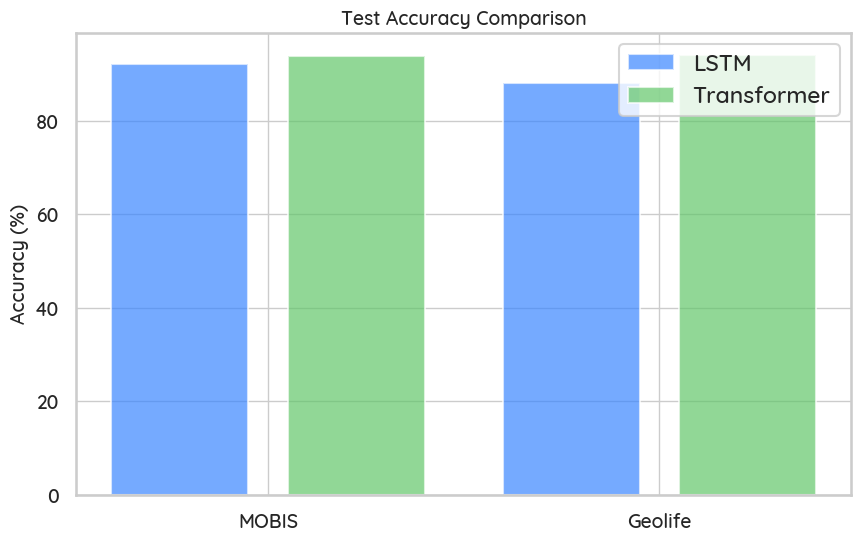

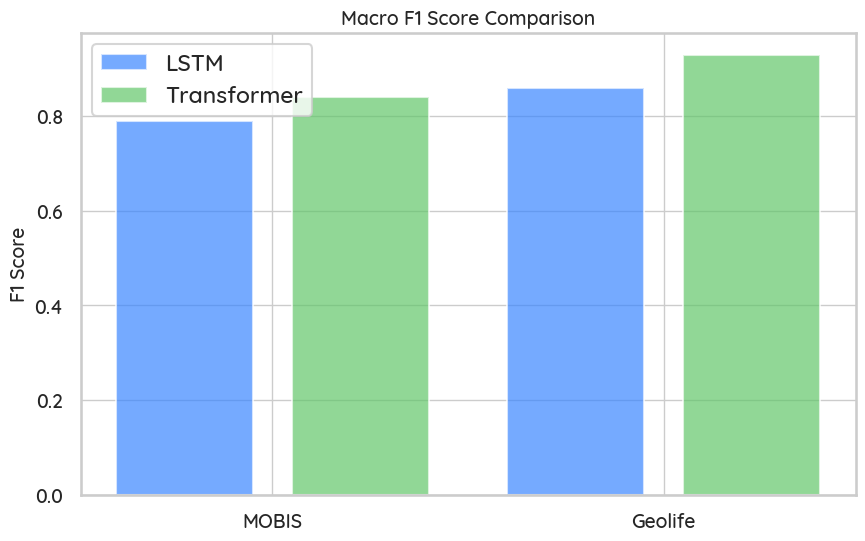

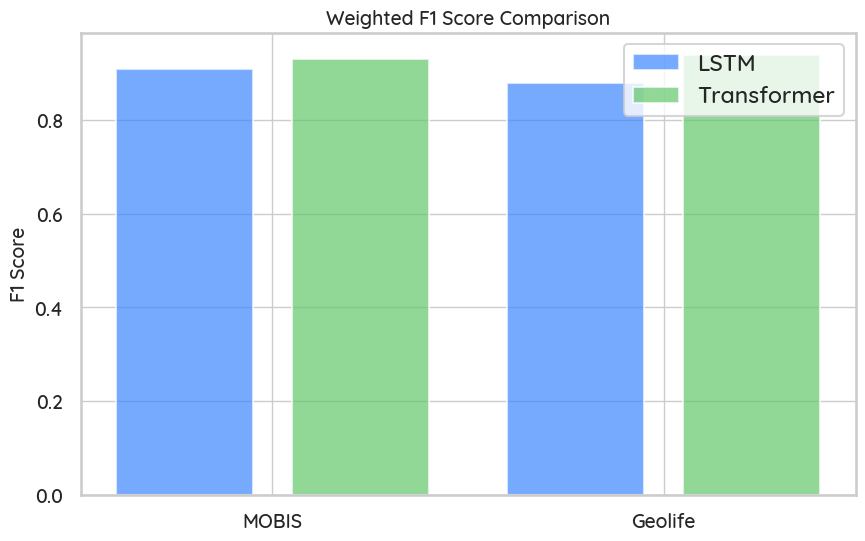

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for performance metrics
datasets = ["MOBIS", "Geolife"]

# Test Accuracy
lstm_accuracy = [92.16, 88.12]
transformer_accuracy = [93.98, 94.17]

# Macro F1 Scores
lstm_macro_f1 = [0.79, 0.86]
transformer_macro_f1 = [0.84, 0.93]

# Weighted F1 Scores
lstm_weighted_f1 = [0.91, 0.88]
transformer_weighted_f1 = [0.93, 0.94]

# Set the style for aesthetic plots
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,
                "xtick.labelsize": 14,
                "ytick.labelsize": 14,
                "axes.titlesize": 14,
                "axes.labelsize": 14,
                "legend.frameon": True
              }, 
              context="talk")

# Adjusted bar width and spacing
bar_width = 0.35
spacing = 0.1
index = np.arange(len(datasets))

# Plot Test Accuracy with space between bars
plt.figure(figsize=(10, 6))
plt.bar(index - (bar_width + spacing)/2, lstm_accuracy, bar_width, label="LSTM", alpha=0.7, color="#3A86FF")
plt.bar(index + (bar_width + spacing)/2, transformer_accuracy, bar_width, label="Transformer", alpha=0.7, color="#62C66A")
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xticks(index, datasets)
plt.legend()
save_path = f"test_acc.png" 
plt.savefig(save_path, dpi=300, bbox_inches='tight') 
plt.show()

# Plot Macro F1 Score with space between bars
plt.figure(figsize=(10, 6))
plt.bar(index - (bar_width + spacing)/2, lstm_macro_f1, bar_width, label="LSTM", alpha=0.7, color="#3A86FF")
plt.bar(index + (bar_width + spacing)/2, transformer_macro_f1, bar_width, label="Transformer", alpha=0.7, color="#62C66A")
plt.title('Macro F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xticks(index, datasets)
plt.legend()
save_path = f"macrof1_acc.png" 
plt.savefig(save_path, dpi=300, bbox_inches='tight') 
plt.show()

# Plot Weighted F1 Score with space between bars
plt.figure(figsize=(10, 6))
plt.bar(index - (bar_width + spacing)/2, lstm_weighted_f1, bar_width, label="LSTM", alpha=0.7, color="#3A86FF")
plt.bar(index + (bar_width + spacing)/2, transformer_weighted_f1, bar_width, label="Transformer", alpha=0.7, color="#62C66A")
plt.title('Weighted F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xticks(index, datasets)
plt.legend()
save_path = f"weightedf1_acc.png" 
plt.savefig(save_path, dpi=300, bbox_inches='tight') 
plt.show()


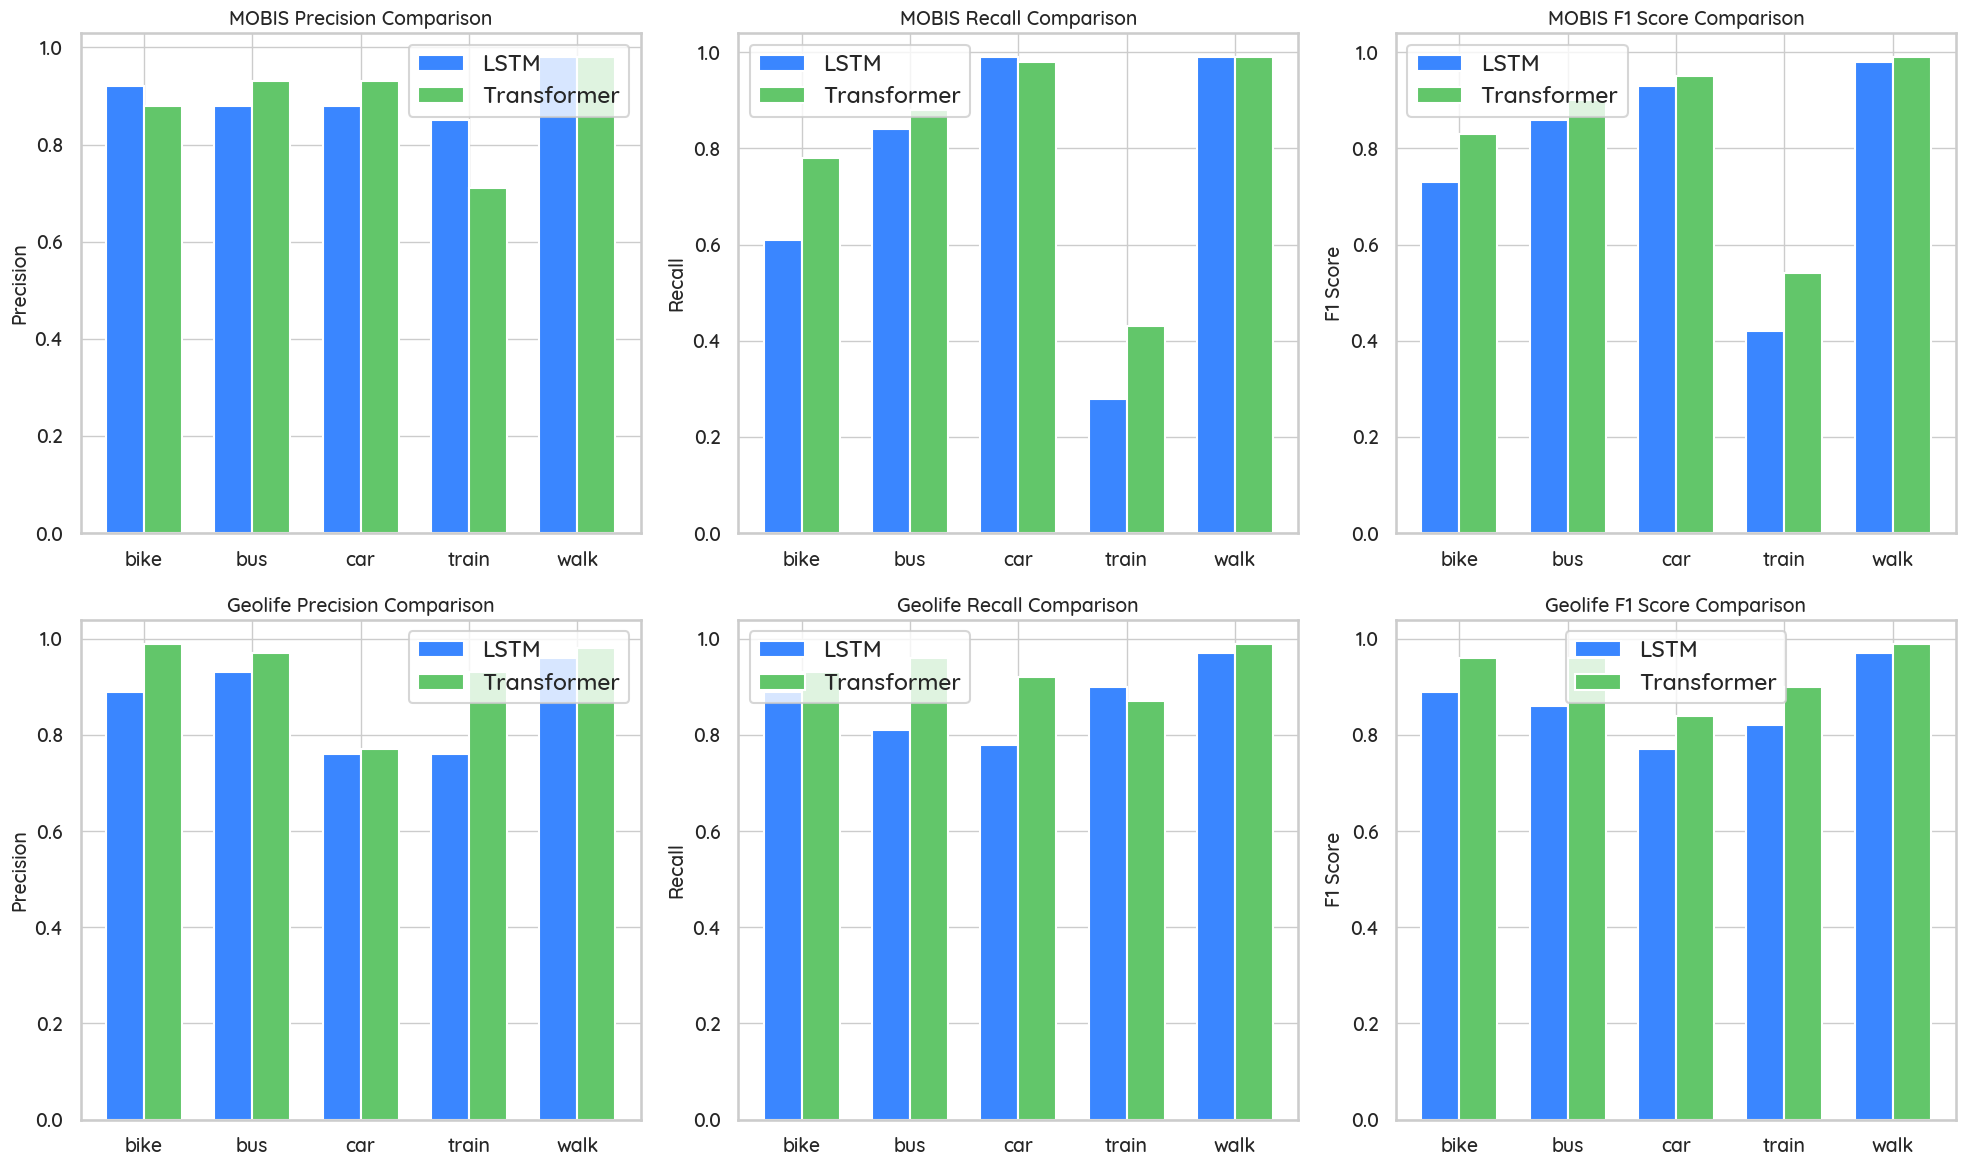

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Data extracted from the provided reports
modes = ['bike', 'bus', 'car', 'train', 'walk']

# Precision, Recall, F1 Scores for each model
lstm_mobis_precision = [0.92, 0.88, 0.88, 0.85, 0.98]
lstm_mobis_recall = [0.61, 0.84, 0.99, 0.28, 0.99]
lstm_mobis_f1 = [0.73, 0.86, 0.93, 0.42, 0.98]

transformer_mobis_precision = [0.88, 0.93, 0.93, 0.71, 0.98]
transformer_mobis_recall = [0.78, 0.88, 0.98, 0.43, 0.99]
transformer_mobis_f1 = [0.83, 0.90, 0.95, 0.54, 0.99]

# Precision, Recall, F1 Scores for Geolife dataset
lstm_geolife_precision = [0.89, 0.93, 0.76, 0.76, 0.96]
lstm_geolife_recall = [0.89, 0.81, 0.78, 0.90, 0.97]
lstm_geolife_f1 = [0.89, 0.86, 0.77, 0.82, 0.97]

transformer_geolife_precision = [0.99, 0.97, 0.77, 0.93, 0.98]
transformer_geolife_recall = [0.93, 0.96, 0.92, 0.87, 0.99]
transformer_geolife_f1 = [0.96, 0.96, 0.84, 0.90, 0.99]

# Create a 2x3 grid for both datasets
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
bar_width = 0.35
index = np.arange(len(modes))

# MOBIS Precision, Recall, F1
# Precision
axes[0, 0].bar(index - bar_width / 2, lstm_mobis_precision, bar_width, label='LSTM', color='#3A86FF')
axes[0, 0].bar(index + bar_width / 2, transformer_mobis_precision, bar_width, label='Transformer', color='#62C66A')
axes[0, 0].set_title('MOBIS Precision Comparison')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_xticks(index)
axes[0, 0].set_xticklabels(modes)
axes[0, 0].legend()

# Recall
axes[0, 1].bar(index - bar_width / 2, lstm_mobis_recall, bar_width, label='LSTM', color='#3A86FF')
axes[0, 1].bar(index + bar_width / 2, transformer_mobis_recall, bar_width, label='Transformer', color='#62C66A')
axes[0, 1].set_title('MOBIS Recall Comparison')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_xticks(index)
axes[0, 1].set_xticklabels(modes)
axes[0, 1].legend()

# F1 Score
axes[0, 2].bar(index - bar_width / 2, lstm_mobis_f1, bar_width, label='LSTM', color='#3A86FF')
axes[0, 2].bar(index + bar_width / 2, transformer_mobis_f1, bar_width, label='Transformer', color='#62C66A')
axes[0, 2].set_title('MOBIS F1 Score Comparison')
axes[0, 2].set_ylabel('F1 Score')
axes[0, 2].set_xticks(index)
axes[0, 2].set_xticklabels(modes)
axes[0, 2].legend()

# Geolife Precision, Recall, F1
# Precision
axes[1, 0].bar(index - bar_width / 2, lstm_geolife_precision, bar_width, label='LSTM', color='#3A86FF')
axes[1, 0].bar(index + bar_width / 2, transformer_geolife_precision, bar_width, label='Transformer', color='#62C66A')
axes[1, 0].set_title('Geolife Precision Comparison')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_xticks(index)
axes[1, 0].set_xticklabels(modes)
axes[1, 0].legend()

# Recall
axes[1, 1].bar(index - bar_width / 2, lstm_geolife_recall, bar_width, label='LSTM', color='#3A86FF')
axes[1, 1].bar(index + bar_width / 2, transformer_geolife_recall, bar_width, label='Transformer', color='#62C66A')
axes[1, 1].set_title('Geolife Recall Comparison')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_xticks(index)
axes[1, 1].set_xticklabels(modes)
axes[1, 1].legend()

# F1 Score
axes[1, 2].bar(index - bar_width / 2, lstm_geolife_f1, bar_width, label='LSTM', color='#3A86FF')
axes[1, 2].bar(index + bar_width / 2, transformer_geolife_f1, bar_width, label='Transformer', color='#62C66A')
axes[1, 2].set_title('Geolife F1 Score Comparison')
axes[1, 2].set_ylabel('F1 Score')
axes[1, 2].set_xticks(index)
axes[1, 2].set_xticklabels(modes)
axes[1, 2].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()



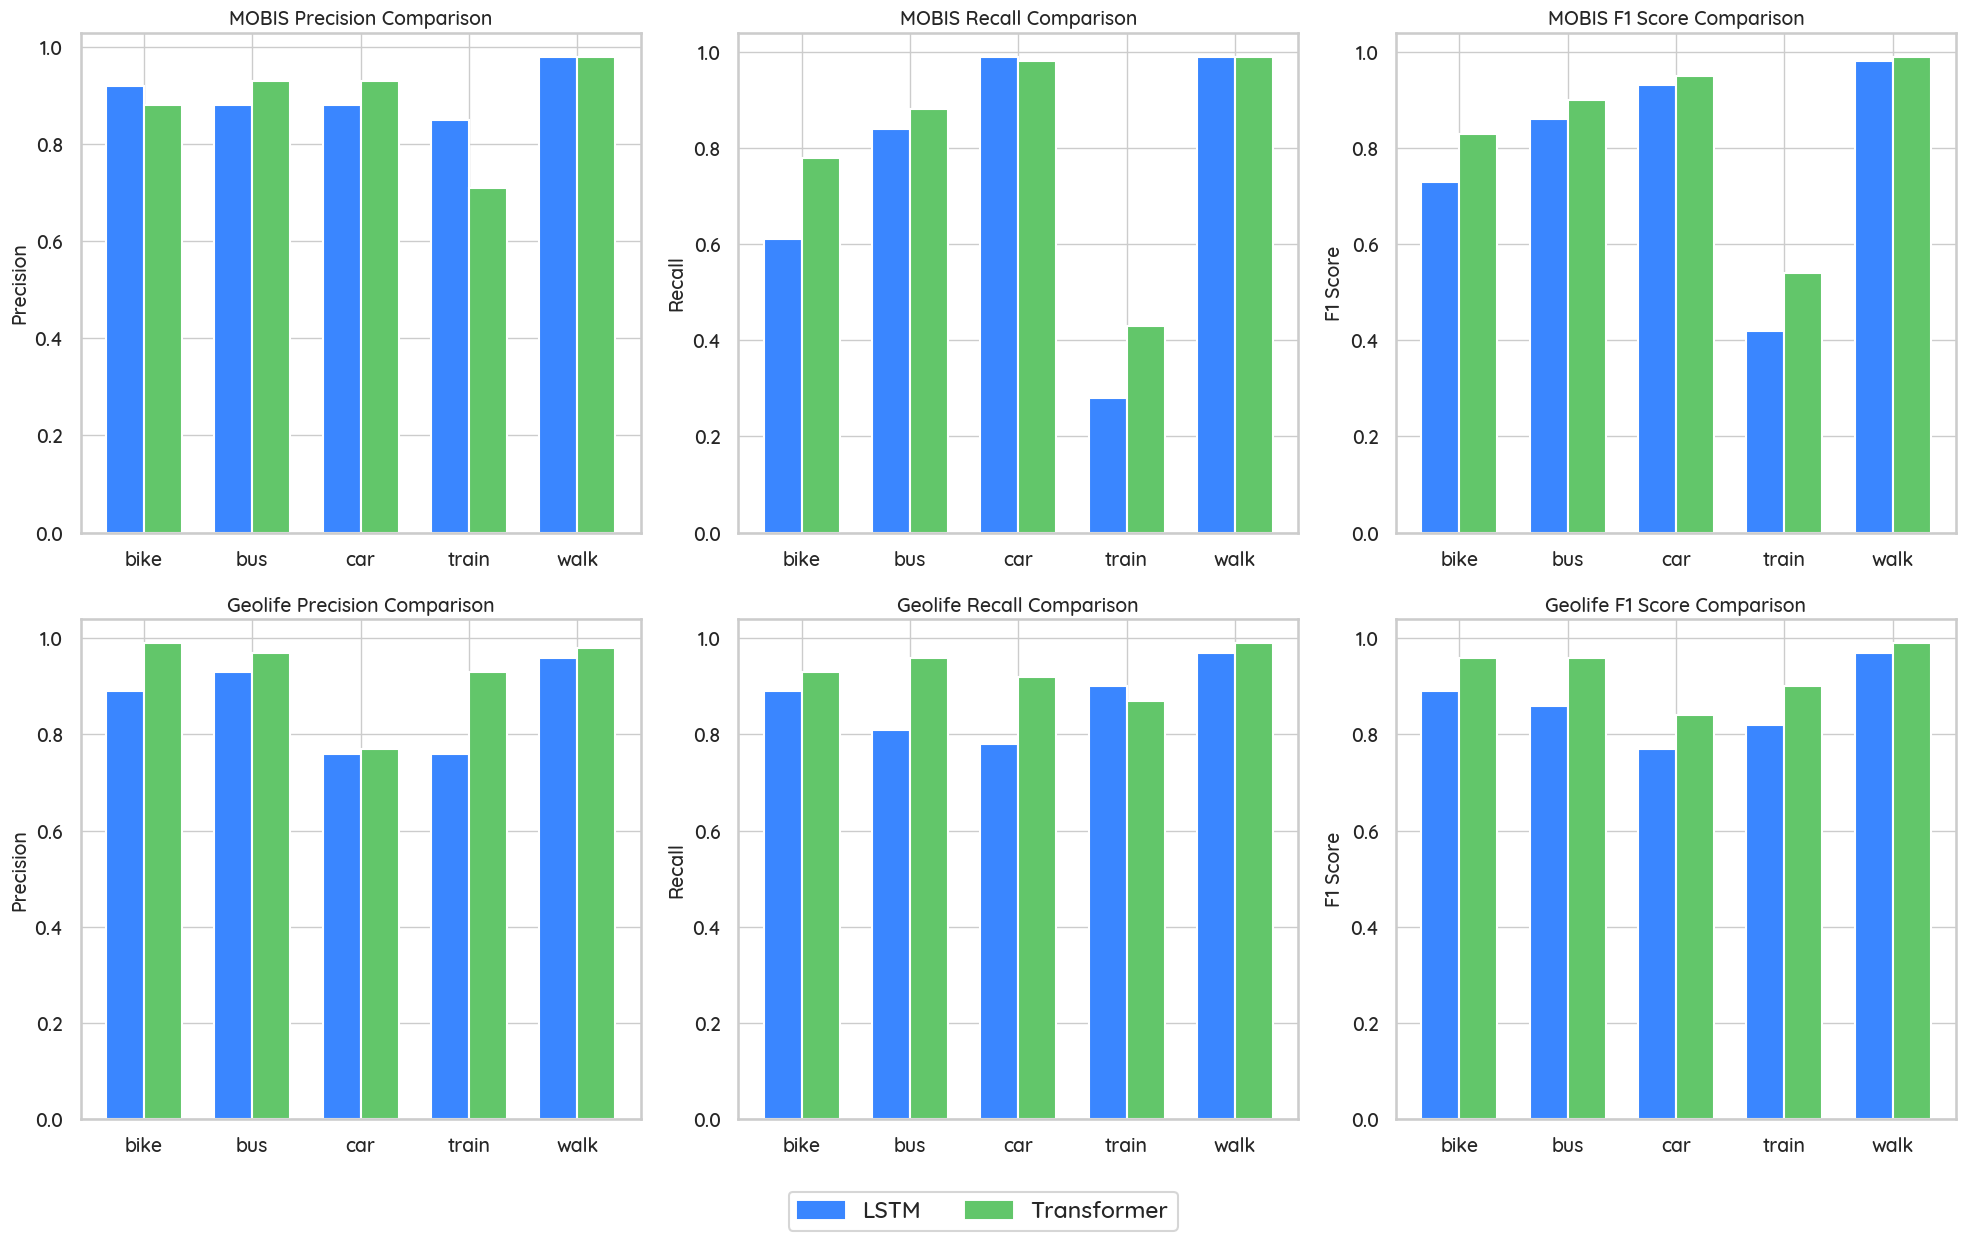

In [14]:
# Create the figure and axes for a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
bar_width = 0.35
index = np.arange(len(modes))

# Define colors and labels for the bars
colors = ['#3A86FF', '#62C66A']
labels = ['LSTM', 'Transformer']

# Iterate through axes and datasets to plot the bars
for row, (lstm_data, transformer_data, dataset) in enumerate([
    ((lstm_mobis_precision, lstm_mobis_recall, lstm_mobis_f1),
     (transformer_mobis_precision, transformer_mobis_recall, transformer_mobis_f1),
     "MOBIS"),
    
    ((lstm_geolife_precision, lstm_geolife_recall, lstm_geolife_f1),
     (transformer_geolife_precision, transformer_geolife_recall, transformer_geolife_f1),
     "Geolife")
]):
    for col, metric in enumerate(['Precision', 'Recall', 'F1 Score']):
        axes[row, col].bar(index - bar_width / 2, lstm_data[col], bar_width, color=colors[0])
        axes[row, col].bar(index + bar_width / 2, transformer_data[col], bar_width, color=colors[1])
        axes[row, col].set_title(f"{dataset} {metric} Comparison")
        axes[row, col].set_ylabel(metric)
        axes[row, col].set_xticks(index)
        axes[row, col].set_xticklabels(modes)

# Create a single legend for all plots, centered at the bottom
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

# Adjust spacing to fit the legend properly
plt.tight_layout()
save_path = f"comparisons.png" 
plt.savefig(save_path, dpi=300, bbox_inches='tight') 
plt.show()


## Finetuning

In [22]:
index = np.arange(len(data_sizes))
index

array([0, 1, 2, 3, 4])

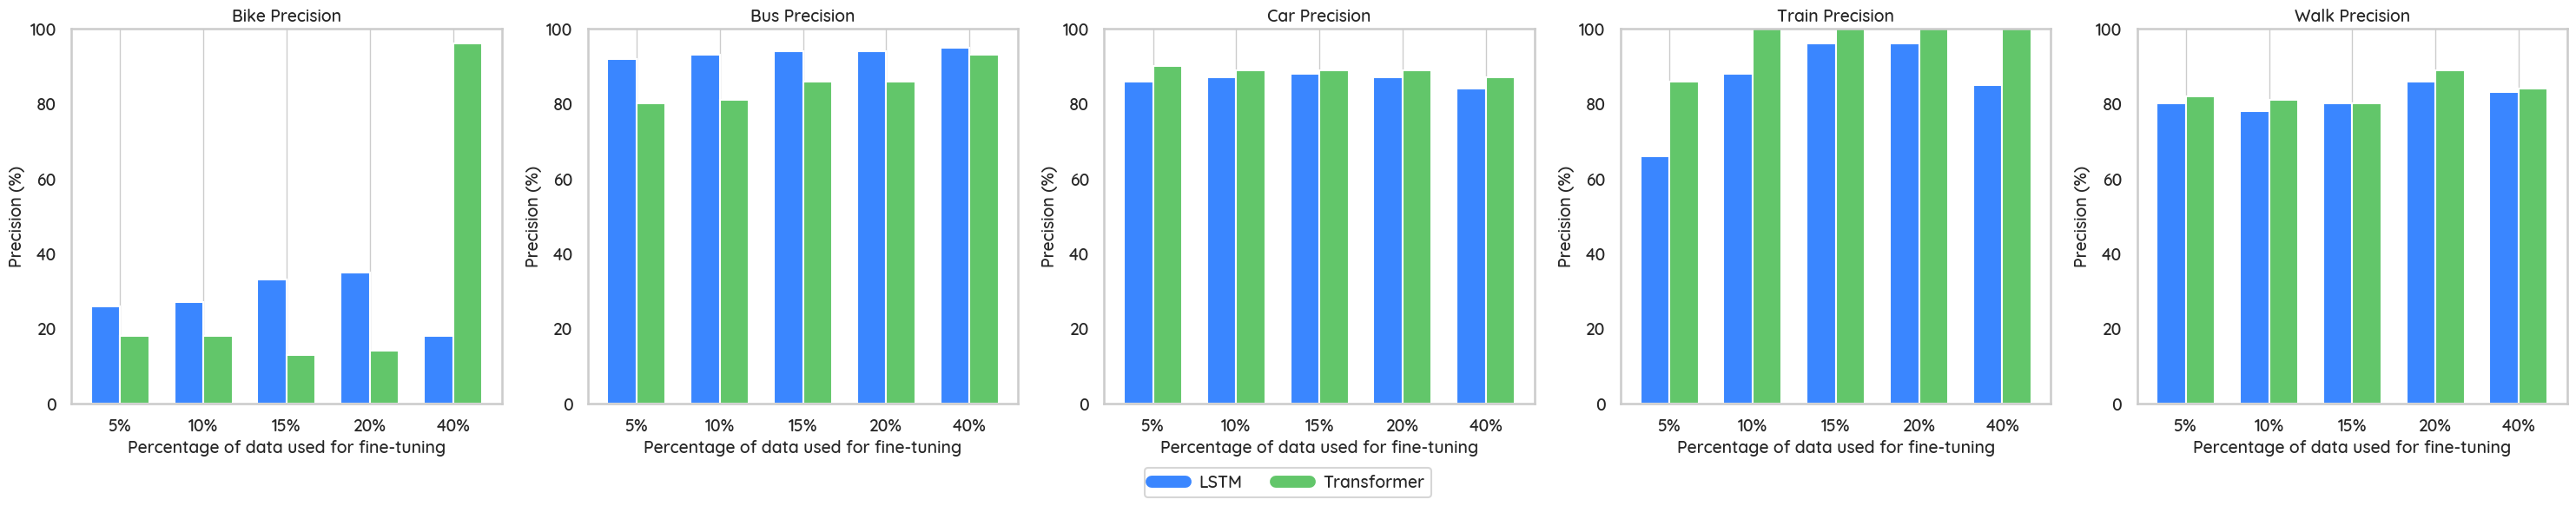

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data for all labels across both models and data sizes
labels = ['bike', 'bus', 'car', 'train', 'walk']
data_sizes_perc = [5, 10, 15, 20, 40]  # percentage of data used
data_sizes = [31, 62, 94, 125, 251]
# Bar width and positions
bar_width = 0.35
index = np.arange(len(data_sizes))

# Precision values for both models (LSTM and Transformer)
lstm_precision = {
    'bike': [26, 27, 33, 35, 18],
    'bus': [92, 93, 94, 94, 95],
    'car': [86, 87, 88, 87, 84],
    'train': [66, 88, 96, 96, 85],
    'walk': [80, 78, 80, 86, 83]
}

transformer_precision = {
    'bike': [18, 18, 13, 14, 96],
    'bus': [80, 81, 86, 86, 93],
    'car': [90, 89, 89, 89, 87],
    'train': [86, 100, 100, 100, 100],
    'walk': [82, 81, 80, 89, 84]
}

# Define the colors and style
colors = ['#3A86FF', '#62C66A']  # Blue for LSTM, Green for Transformer
sns.set_theme(style="whitegrid", 
              palette=colors, 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,
                "xtick.labelsize": 14,
                "ytick.labelsize": 14,
                "axes.titlesize": 14,
                "axes.labelsize": 14,
                "legend.frameon": True
              }, 
              context="talk")


#  Plotting precision for each label with a single legend for the entire figure
fig, axes = plt.subplots(1, 5, figsize=(30, 6))  
axes = axes.flatten()  

for idx, label in enumerate(labels):
    axes[idx].bar(index - bar_width/2, lstm_precision[label], bar_width, color=colors[0])
    axes[idx].bar(index + bar_width/2, transformer_precision[label], bar_width, color=colors[1])
    axes[idx].set_title(f'{label.capitalize()} Precision')
    axes[idx].set_xlabel('Percentage of data used for fine-tuning')
    axes[idx].set_ylabel('Precision (%)')
    axes[idx].set_xticks(index)
    axes[idx].set_xticklabels([f"{perc}%" for size, perc in zip(data_sizes, data_sizes_perc)])
    axes[idx].set_ylim(0, 100)
    axes[idx].grid(axis='y')

for ax in axes[len(labels):]:
    ax.remove()

# Creating a single legend for the entire figure at the bottom
handles = [
    plt.Line2D([0], [0], color=colors[0], lw=10, label='LSTM'),
    plt.Line2D([0], [0], color=colors[1], lw=10, label='Transformer')
]
fig.legend(handles=handles, loc='lower center', ncol=2, fontsize=14)

# Adjust layout to fit the legend properly
plt.tight_layout(rect=[0, 0.05, 1, 1])  
save_path = f"finetuning_miniprogram_classes.png" 
plt.savefig(save_path, dpi=300, bbox_inches='tight') 
plt.show()


## EXTRA

In [14]:
import pandas as pd

# Load the CSV files
df1 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram1.csv')
df2 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram2.csv')
df3 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram3.csv')

# Concatenate all dataframes
combined = pd.concat([df1, df2, df3], ignore_index=True)

# Count the total number of unique traj_ids before removal
total_unique_traj_ids = combined['traj_id'].nunique()

# Identify the unique traj_ids and remove duplicates (keeping the first full trajectory)
unique_traj_ids = combined.drop_duplicates(subset='traj_id', keep='first')['traj_id']

# Count the unique traj_ids after removal
remaining_unique_traj_ids = unique_traj_ids.nunique()

# Calculate the number of dropped unique traj_ids
dropped_traj_ids = total_unique_traj_ids - remaining_unique_traj_ids

# Filter to keep only rows with the selected unique traj_id
result = combined[combined['traj_id'].isin(unique_traj_ids)]

# Display the result and the count of dropped traj_ids
print(f"Number of unique traj_id dropped: {dropped_traj_ids}")
print(f"Number of unique traj_id retained: {remaining_unique_traj_ids}")

Number of unique traj_id dropped: 0
Number of unique traj_id retained: 2152


In [13]:
result.to_csv('/data/A-TrajectoryTransformer/data/miniprogram_merged.csv')

In [15]:
import pandas as pd
df = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram_merged_speed_statistics.csv')
df

,label,count,mean,std,min,max,num_trips,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
0,walk,376273,3.019790,3.216707,0.100014,14.999632,1623,0.283950,0.655041,1.860086,4.235510,7.520926
1,car,40885,32.702078,27.876181,3.000429,179.572043,205,4.716344,10.157680,25.526845,47.178410,71.160769
2,bus,32547,21.630642,26.163828,1.000014,119.996834,259,1.790174,3.432483,8.434118,32.279008,63.862125
3,bike,4901,15.574184,18.014511,0.501067,79.846176,36,1.074648,2.761329,7.084282,22.416550,44.869650
4,train,1505,76.619358,79.676910,3.049910,349.721998,46,5.184927,14.388273,56.576113,95.490633,195.551539


In [16]:
import pandas as pd

# Load your data (assuming it's in a CSV file for demonstration purposes)
data = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram_merged.csv')

# Separate the 'walk' trips and other trips
walk_trips = data[data['label'] == 'walk']
other_trips = data[data['label'] != 'walk']

# Randomly sample 150 unique 'walk' trips based on traj_id
unique_walk_traj_ids = walk_trips['traj_id'].unique()
selected_walk_traj_ids = pd.Series(unique_walk_traj_ids).sample(n=100, random_state=42)

# Filter the walk trips to keep only the selected ones
filtered_walk_trips = walk_trips[walk_trips['traj_id'].isin(selected_walk_traj_ids)]

# Combine the filtered walk trips with the other trips
data_filtered = pd.concat([filtered_walk_trips, other_trips])

# Save the filtered dataset (optional)
data_filtered.to_csv('/data/A-TrajectoryTransformer/data/miniprogram_balanced.csv', index=False)

# Display the result
print("Filtered dataset ready!")


Filtered dataset ready!


In [8]:
result

,time_diff,speed,distance,traj_id,label
0,16.788,4.491887,20.947168,0601950565e25f15004d2df34936918b,walk
1,17.315,1.150650,5.534309,0601950565e25f15004d2df34936918b,walk
2,20.078,3.033680,16.919507,0601950565e25f15004d2df34936918b,walk
3,11.285,6.326577,19.832063,0601950565e25f15004d2df34936918b,walk
4,10.025,0.264797,0.737387,0601950565e25f15004d2df34936918b,walk
...,...,...,...,...,...
456106,10.112,36.188906,101.650615,f5835fa66762c68d0356d496604f1972,car
456107,12.946,10.684758,38.423576,f5835fa66762c68d0356d496604f1972,car
456108,9.954,5.576984,15.420360,f5835fa66762c68d0356d496604f1972,car
456109,10.053,10.566986,29.508308,f5835fa66762c68d0356d496604f1972,car


In [9]:
import pandas as pd

# Load the CSV files
df1 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram1.csv')
df2 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram2.csv')
df3 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram3.csv')

# Check for overlapping elements in the 'traj_id' column
overlap_12 = set(df1['traj_id']).intersection(df2['traj_id'])
overlap_13 = set(df1['traj_id']).intersection(df3['traj_id'])
overlap_23 = set(df2['traj_id']).intersection(df3['traj_id'])

# Combine all overlapping results
all_overlaps = overlap_12.union(overlap_13).union(overlap_23)





{'b751f28065a4cc87071bf6315ccad279',
 '0b153f9a65a64b670735a31419b2ec34',
 '80e3bed0659f500c06b319ef13cdafec',
 'e8da08086651ebd801a939ad2d91e2b2',
 'f18e14fa65588360060cc829458c1453',
 '8de6ebcc6547806b0957cafa3d3be190',
 '2da1518365fccf6d03abe0c7727227d8',
 '7027b65465a07c8e06a02ed62bc7f5ab',
 '80e3bed0659df9dd0692f7be26f1c912',
 '2842063e656015080007fb3b43e0676d',
 '80e3bed06560567f00a6286b3975afad',
 '7027b654658e593d052af0893507fbbb',
 'a3df94cc6651ce0b01a433f43740018a',
 'a5782af7654175ca01535b5403f71fe7',
 'a72823ff658d28fe051d30616dbf3979',
 'f624ef406543ef13019173a01f1b6014',
 '0b153f9a658a0e6604c1a8cc38811757',
 '3fa9b3126629d32408cf8e90552f5e00',
 '0601950566150211067d0d5e1fdd5c5e',
 '63ca5b136604b67404c6bb5c394e3966',
 'a72823ff658e057b0531f104609b537c',
 'b751f280656f397d02479a877aa6960d',
 '09e787686595e46005b5a95332adb314',
 'a72823ff658e5b9d05450efb4788f6fb',
 '0b153f9a6596ac8d05bf024f16fb2bbc',
 'aeff410b6543ee6d0150eb5f54839353',
 'f624ef406541d4d3015d3aaf09c85c5c',
 

In [10]:
len(all_overlaps)

1319